In [1]:
import matplotlib.pyplot as plt
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import cv2
import numpy as np 
from tensorflow.python.framework import graph_util
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data1='/content/drive/My Drive/fintest/1coal'
data2='/content/drive/My Drive/fintest/2coal'
data3='/content/drive/My Drive/fintest/3coal'

In [0]:
def data_with_label():
    images=[]
    cnt = 0
    for i in tqdm(os.listdir(data1)):
        path=os.path.join(data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([1,0,0])])
    cnt = 0
    for i in tqdm(os.listdir(data2)):
        path=os.path.join(data2,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([0,1,0])])
    cnt = 0
    for i in tqdm(os.listdir(data2)):
        path=os.path.join(data3,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        images.append([np.array(img),np.array([0,0,1])])
        
    shuffle(images)
    return images

In [5]:
data = data_with_label()

100%|██████████| 299/299 [04:27<00:00,  1.02it/s]


In [0]:
train_data, test_data = train_test_split(data, test_size=0.2)

In [0]:
tr_img_data = np.array([i[0] for i in train_data]).reshape(-1,64,64,1)
tr_img_data = tr_img_data/255
tr_lbl_data = np.array([i[1] for i in train_data])
tst_img_data = np.array([i[0] for i in test_data]).reshape(-1,64,64,1)
tst_img_data = tst_img_data/255
tst_lbl_data = np.array([i[1] for i in test_data])

In [8]:
model=Sequential()
model.add(InputLayer(input_shape=[64,64,1]))

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))
          
model.add(Conv2D(filters=32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))
          
model.add(Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=8,padding='same'))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))
          
model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3,padding='same'))
          

model.add(Flatten())


model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.50))
#model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.50))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(3,activation='softmax'))
optimizer=Adam(lr=1e-3)
          
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=35,batch_size=64)
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/35





790/790 [==============================] - 13s 17ms/step - loss: 1.0990 - acc: 0.3823
Epoch 2/35
790/790 [==============================] - 0s 234us/step - loss: 1.0910 - acc: 0.4000
Epoch 3/35
790/790 [==============================] - 0s 229us/step - loss: 1.0897 - acc: 0.4000
Epoch 4/35
790/790 [==============================] - 0s 225us/step - loss: 1.0838 - acc: 0.4000
Epoch 5/35
790/790 [==============================] - 0s 245us/step - loss: 1.0503 - acc: 0.4544
Epoch 6/35
790/790 [==============================] - 0s 230us/step - loss: 0.9589 - acc: 0.5316
Epoch 7/35
790/790 [==============================] - 0s 228us/step - loss: 0.9432 - acc: 0.5468
Epoch 8/35
790/790 [==============================] - 0s 219us/step - loss: 0.8358 - acc: 0.5810


In [9]:
# serialize model to JSON
scores = model.evaluate(tr_img_data, tr_lbl_data, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(tst_img_data, tst_lbl_data, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
model_json = model.to_json()
with open("modelfin22.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelfin22.h5")
print("Saved model to disk")
 


acc: 99.75%
acc: 82.32%
Saved model to disk


dict_keys(['loss', 'acc'])


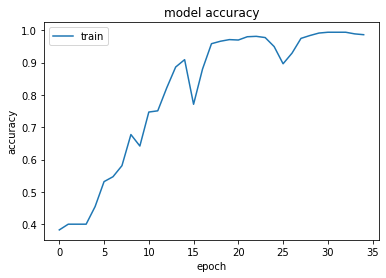

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


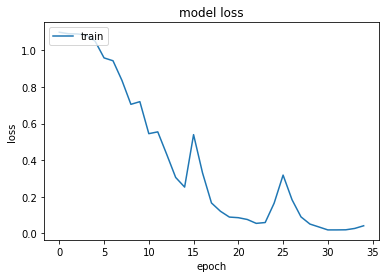

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()